# Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y

# Import dataset

In [2]:
df = pd.read_csv(r"C:\Users\Rupali\Downloads\PD data1 sent to Proajyot Sir.csv")

# Removing columns 

In [3]:
df = df.drop(["Sr.","name","MDVP:Shimmer(dB)","MDVP:PPQ","MDVP:Jitter(Abs)","Shimmer:APQ5","MDVP:Jitter(%)","MDVP:Flo(Hz)"], axis=1)

2 are unique id and 5 by feature selection

# Splitting data into Train and Test

In [4]:
train_df, test_df = train_test_split(df, 
                                     test_size=0.2, 
                                     random_state=42)

# Splitting Train data into train and Validation

In [5]:
train_df, val_df = train_test_split(train_df,
                                    test_size=0.2,
                                    random_state=42)

In [6]:
train_df.shape,test_df.shape,val_df.shape

((124, 17), (39, 17), (32, 17))

# Balancing Data

In [7]:
train_df.status.value_counts()

1    92
0    32
Name: status, dtype: int64

In [8]:
c_1,c_0=train_df["status"].value_counts()
c_1,c_0
train_df_0=train_df.loc[df["status"]==0]
train_df_1=train_df.loc[df["status"]==1]
train_df_0.shape,train_df_1.shape
class_over=train_df_0.sample(92,replace=True,random_state=100)
class1_0=pd.concat([class_over,train_df_1],axis=0)
class1_0.status.value_counts()

0    92
1    92
Name: status, dtype: int64

In [9]:
train_df=class1_0

In [10]:
X_train = train_df.drop('status', axis=1).values.astype('float32')
y_train = train_df['status'].values.astype('int32')
X_val = val_df.drop('status', axis=1).values.astype('float32')
y_val = val_df['status'].values.astype('int32')
X_test = test_df.drop('status', axis=1).values.astype('float32')
y_test = test_df['status'].values.astype('int32')

# Standardization

In [11]:
mmsc = MinMaxScaler()
X_train = mmsc.fit_transform(X_train) 
X_val = mmsc.transform(X_val)
X_test = mmsc.transform(X_test)

In [12]:
# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, input_shape=(16, 1), activation='relu', return_sequences=True))
# model.add(LSTM(64))
# model.add(Dense(32))
# model.add(Dense(1))

# # Compile the model
# model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=100, batch_size=32)

# # Evaluate the model on test data
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

In [13]:
# model.evaluate(X_test, y_test)

In [14]:
# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(32, input_shape=(16, 1)))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32)

# # Evaluate the model on the test data
# loss, accuracy = model.evaluate(X_test, y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

In [15]:
# y_train = to_categorical(y_train)
# y_val = to_categorical(y_val)
# y_test = to_categorical(y_test)

In [16]:
shape = X_train.shape[1]
#num_classes = y_train.shape[1]


model = Sequential()
model.add(LSTM(128, input_shape=(16, 1), activation='relu', return_sequences=True))
model.add(LSTM(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))
opt = tfa.optimizers.RectifiedAdam()
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 118593 (463.25 KB)
Trainable params: 118593 (463.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=22, epochs=500, 
                    validation_data=(X_val, y_val), callbacks=[es_callback])

Epoch 1/500
9/9 [==============================] - 4s 141ms/step - loss: 0.4648 - accuracy: 0.5000 - val_loss: 0.6492 - val_accuracy: 0.2812
Epoch 2/500
9/9 [==============================] - 0s 22ms/step - loss: 0.4408 - accuracy: 0.5000 - val_loss: 0.6116 - val_accuracy: 0.2812
Epoch 3/500
9/9 [==============================] - 0s 24ms/step - loss: 0.4089 - accuracy: 0.5000 - val_loss: 0.5579 - val_accuracy: 0.2812
Epoch 4/500
9/9 [==============================] - 0s 27ms/step - loss: 0.3668 - accuracy: 0.5000 - val_loss: 0.4856 - val_accuracy: 0.2812
Epoch 5/500
9/9 [==============================] - 0s 29ms/step - loss: 0.3172 - accuracy: 0.5000 - val_loss: 0.3914 - val_accuracy: 0.2812
Epoch 6/500
9/9 [==============================] - 0s 22ms/step - loss: 0.2528 - accuracy: 0.5163 - val_loss: 0.2916 - val_accuracy: 0.3125
Epoch 7/500
9/9 [==============================] - 0s 23ms/step - loss: 0.2088 - accuracy: 0.7609 - val_loss: 0.2125 - val_accuracy: 0.6562
Epoch 8/500
9/9 [==

9/9 [==============================] - 0s 37ms/step - loss: 0.1225 - accuracy: 0.8533 - val_loss: 0.1660 - val_accuracy: 0.6250
Epoch 60/500
9/9 [==============================] - 0s 20ms/step - loss: 0.1251 - accuracy: 0.8587 - val_loss: 0.1756 - val_accuracy: 0.6562
Epoch 61/500
9/9 [==============================] - 0s 23ms/step - loss: 0.1247 - accuracy: 0.8424 - val_loss: 0.1949 - val_accuracy: 0.5938
Epoch 62/500
9/9 [==============================] - 0s 29ms/step - loss: 0.1152 - accuracy: 0.8967 - val_loss: 0.1873 - val_accuracy: 0.5938
Epoch 63/500
9/9 [==============================] - 0s 23ms/step - loss: 0.1185 - accuracy: 0.8750 - val_loss: 0.1669 - val_accuracy: 0.6562
Epoch 64/500
9/9 [==============================] - 0s 21ms/step - loss: 0.1099 - accuracy: 0.8859 - val_loss: 0.2199 - val_accuracy: 0.6250
Epoch 65/500
9/9 [==============================] - 0s 22ms/step - loss: 0.1219 - accuracy: 0.8478 - val_loss: 0.1887 - val_accuracy: 0.6562
Epoch 66/500
9/9 [========

9/9 [==============================] - 0s 22ms/step - loss: 0.0612 - accuracy: 0.9402 - val_loss: 0.0941 - val_accuracy: 0.9062
Epoch 118/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0633 - accuracy: 0.9402 - val_loss: 0.0857 - val_accuracy: 0.9062
Epoch 119/500
9/9 [==============================] - 0s 22ms/step - loss: 0.0639 - accuracy: 0.9511 - val_loss: 0.1361 - val_accuracy: 0.7812
Epoch 120/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0623 - accuracy: 0.9348 - val_loss: 0.0992 - val_accuracy: 0.8438
Epoch 121/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0496 - accuracy: 0.9565 - val_loss: 0.0971 - val_accuracy: 0.8750
Epoch 122/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0461 - accuracy: 0.9620 - val_loss: 0.1060 - val_accuracy: 0.8438
Epoch 123/500
9/9 [==============================] - 0s 27ms/step - loss: 0.0439 - accuracy: 0.9620 - val_loss: 0.0956 - val_accuracy: 0.8750
Epoch 124/500
9/9 [=

Epoch 175/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0268 - accuracy: 0.9837 - val_loss: 0.0655 - val_accuracy: 0.9062
Epoch 176/500
9/9 [==============================] - 0s 26ms/step - loss: 0.0234 - accuracy: 0.9837 - val_loss: 0.0692 - val_accuracy: 0.9062
Epoch 177/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0256 - accuracy: 0.9837 - val_loss: 0.0716 - val_accuracy: 0.9062
Epoch 178/500
9/9 [==============================] - 0s 25ms/step - loss: 0.0297 - accuracy: 0.9728 - val_loss: 0.0674 - val_accuracy: 0.9062
Epoch 179/500
9/9 [==============================] - 0s 20ms/step - loss: 0.0269 - accuracy: 0.9837 - val_loss: 0.0516 - val_accuracy: 0.9062
Epoch 180/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0252 - accuracy: 0.9783 - val_loss: 0.0720 - val_accuracy: 0.9062
Epoch 181/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0289 - accuracy: 0.9728 - val_loss: 0.0692 - val_accuracy: 0.9062
Epoch 

Epoch 233/500
9/9 [==============================] - 0s 21ms/step - loss: 0.0126 - accuracy: 0.9946 - val_loss: 0.0430 - val_accuracy: 0.9375
Epoch 234/500
9/9 [==============================] - 0s 24ms/step - loss: 0.0119 - accuracy: 0.9946 - val_loss: 0.0524 - val_accuracy: 0.9062
Epoch 235/500
9/9 [==============================] - 0s 27ms/step - loss: 0.0099 - accuracy: 0.9946 - val_loss: 0.0479 - val_accuracy: 0.9062
Epoch 236/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0137 - accuracy: 0.9783 - val_loss: 0.0560 - val_accuracy: 0.9062
Epoch 237/500
9/9 [==============================] - 0s 20ms/step - loss: 0.0155 - accuracy: 0.9837 - val_loss: 0.0533 - val_accuracy: 0.9375
Epoch 238/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0149 - accuracy: 0.9891 - val_loss: 0.0532 - val_accuracy: 0.9062
Epoch 239/500
9/9 [==============================] - 0s 23ms/step - loss: 0.0099 - accuracy: 0.9946 - val_loss: 0.0503 - val_accuracy: 0.9375
Epoch 

# model Evaluation

In [18]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 17ms/step - loss: 0.0561 - accuracy: 0.9744


[0.05608132481575012, 0.9743589758872986]

In [19]:
y_pred=model.predict(X_test)
# y_pred

2/2 [==============================] - 1s 0s/step


In [20]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [21]:
pred=np.where(y_pred>0.50,1,0)

In [22]:
# pred

In [23]:
cf=confusion_matrix(y_test,pred)
cf

array([[ 6,  1],
       [ 0, 32]], dtype=int64)

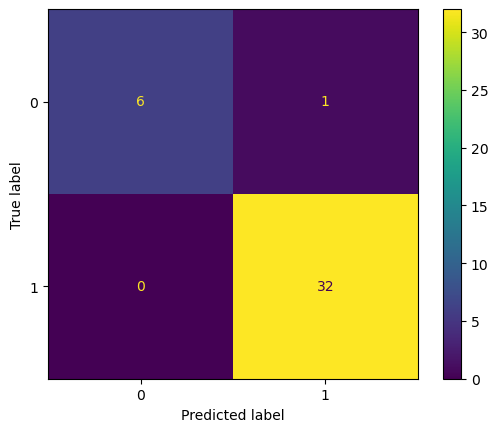

In [24]:
ConfusionMatrixDisplay(confusion_matrix=cf).plot()

In [25]:
acc=cf.diagonal().sum()/cf.sum()*100
acc

97.43589743589743

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39

